# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [218]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai


In [219]:
# import os

# os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
# os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
# os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

!pip install pyinputplus

## 📦 Setup and Configuration
Import required packages and setup environment.

In [220]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
# ✅ Import after installing (if needed)
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response

# Add any other setup code here

## 🌤️ Weather Data Functions

In [221]:
# Define get_weather_data() function here
def get_weather_data(location, forecast_days=5):
    """
    Retrieve weather data for a specified location.

    Args:
        location (str): City or location name
        forecast_days (int): Number of days to forecast (1-5)

    Returns:
        dict: Weather data including current conditions and forecast
    """
    pass

## 📊 Visualisation Functions

In [222]:
# Define create_temperature_visualisation() and create_precipitation_visualisation() here
def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of temperature data.

    Args:
        weather_data (dict): The processed weather data
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib figure object
        Otherwise, displays the visualisation in the notebook
    """
    pass


In [223]:

def create_precipitation_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of precipitation data.

    Args:
        weather_data (dict): The processed weather data
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib figure object
        Otherwise, displays the visualisation in the notebook
    """
    pass

## 🤖 Natural Language Processing

In [224]:
# Define parse_weather_question() and generate_weather_response() here
def parse_weather_question(question):
    """
    Parse a natural language weather question.

    Args:
        question (str): User's weather-related question

    Returns:
        dict: Extracted information including location, time period, and weather attribute
    """
    pass

## 🧭 User Interface

In [225]:
# Define menu functions using pyinputplus or ipywidgets here

## 🧩 Main Application Logic

In [226]:
# Tie everything together here
def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question.

    Args:
        parsed_question (dict): Parsed question data
        weather_data (dict): Weather data

    Returns:
        str: Natural language response
    """
    pass

## 🧪 Testing and Examples

In [227]:
import os
import re
import math
import requests
import pandas as pd
import matplotlib.pyplot as plt
import pyinputplus as pyip
from datetime import datetime, timedelta
from typing import Dict, Any, Optional, Tuple, List

In [228]:
# -----------------------------
# 🌍 Geocoding helper (Open-Meteo)
# -----------------------------
def geocode_location(name: str) -> Tuple[float, float, str, str]:
    """Return (lat, lon, city, country) for a location name using Open-Meteo Geocoding."""
    resp = requests.get(
        "https://geocoding-api.open-meteo.com/v1/search",
        params={"name": name, "count": 1, "language": "en", "format": "json"},
        timeout=20,
    )
    resp.raise_for_status()
    data = resp.json()
    if not data.get("results"):
        raise ValueError(f"Could not find location: {name}")
    r = data["results"][0]
    return float(r["latitude"]), float(r["longitude"]), r.get("name", name), r.get("country", "")


In [229]:
# -----------------------------
# 🌤️ Weather Data Functions
# -----------------------------
def get_weather_data(location: str, forecast_days: int = 5) -> Dict[str, Any]:
    """
    Retrieve weather data for a specified location from Open-Meteo.
    Args:
        location (str): City or location name (e.g., "Dhaka")
        forecast_days (int): 1–7 days forecast
    Returns:
        dict: {
          'location': {'query': str, 'city': str, 'country': str, 'lat': float, 'lon': float},
          'daily': pd.DataFrame with columns [date, temp_max, temp_min, precipitation_mm, windspeed_max],
          'fetched_at': iso string
        }
    """
    forecast_days = max(1, min(int(forecast_days), 7))  # Open-Meteo safe default
    lat, lon, city, country = geocode_location(location)

    params = {
        "latitude": lat,
        "longitude": lon,
        "daily": "temperature_2m_max,temperature_2m_min,precipitation_sum,windspeed_10m_max",
        "timezone": "Asia/Dhaka",            # adjust if you prefer UTC
        "forecast_days": forecast_days
    }
    r = requests.get("https://api.open-meteo.com/v1/forecast", params=params, timeout=30)
    r.raise_for_status()
    j = r.json()
    daily = j.get("daily", {})

    df = pd.DataFrame({
        "date": daily.get("time", []),
        "temp_max": daily.get("temperature_2m_max", []),
        "temp_min": daily.get("temperature_2m_min", []),
        "precipitation_mm": daily.get("precipitation_sum", []),
        "windspeed_max": daily.get("windspeed_10m_max", []),
    })
    # Ensure proper dtypes
    if not df.empty:
        df["date"] = pd.to_datetime(df["date"])
        for c in ["temp_max", "temp_min", "precipitation_mm", "windspeed_max"]:
            df[c] = pd.to_numeric(df[c], errors="coerce")

    return {
        "location": {"query": location, "city": city, "country": country, "lat": lat, "lon": lon},
        "daily": df,
        "fetched_at": datetime.now().isoformat(timespec="seconds")
    }

In [230]:
# -----------------------------
# 📊 Visualisation Functions
# -----------------------------
def create_temperature_visualisation(weather_data: Dict[str, Any], output_type: str = 'display'):
    """
    Plot max/min temperature lines.
    Returns a matplotlib figure if output_type == 'figure', else displays.
    """
    df = weather_data["daily"].copy()
    if df.empty:
        raise ValueError("No daily data to plot.")

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df["date"], df["temp_max"], marker="o", label="Max °C")
    ax.plot(df["date"], df["temp_min"], marker="o", label="Min °C")
    ax.set_title(f"Daily Temperatures — {weather_data['location']['city']}, {weather_data['location']['country']}")
    ax.set_xlabel("Date")
    ax.set_ylabel("°C")
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    if output_type == 'figure':
        return fig
    else:
        plt.show()

def create_precipitation_visualisation(weather_data: Dict[str, Any], output_type: str = 'display'):
    """
    Bar chart of daily precipitation.
    Returns a matplotlib figure if output_type == 'figure', else displays.
    """
    df = weather_data["daily"].copy()
    if df.empty:
        raise ValueError("No daily data to plot.")

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(df["date"], df["precipitation_mm"])
    ax.set_title(f"Daily Precipitation — {weather_data['location']['city']}, {weather_data['location']['country']}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Precipitation (mm)")
    plt.xticks(rotation=45)
    plt.tight_layout()

    if output_type == 'figure':
        return fig
    else:
        plt.show()

In [231]:
# -----------------------------
# 🤖 Natural Language Parsing
# -----------------------------
_TIME_WORDS = {
    "today": 0,
    "tomorrow": 1,
    "day after tomorrow": 2,
    "next day": 1
}
_ATTRS = {
    "rain": "precipitation",
    "precipitation": "precipitation",
    "wet": "precipitation",
    "temperature": "temperature",
    "hot": "temperature",
    "cold": "temperature",
    "wind": "wind"
}

def _extract_location(q: str) -> Optional[str]:
    """
    Very simple location extractor: looks for 'in <word(s)>' pattern.
    Example: 'Will it rain in Dhaka tomorrow?' -> 'Dhaka'
    """
    m = re.search(r"\bin\s+([A-Za-z\s]+?)(?:\?|\.|,|$)", q, flags=re.IGNORECASE)
    if m:
        return m.group(1).strip()
    return None

def parse_weather_question(question: str) -> Dict[str, Any]:
    """
    Parse a natural language question into:
      - location (optional)
      - days_ahead (0=today)
      - days_span (if "next 3 days")
      - attribute ('precipitation' / 'temperature' / 'wind')
    """
    q = question.strip().lower()

    # location
    location = _extract_location(q)

    # days_ahead / span
    days_ahead = 0
    for k, v in _TIME_WORDS.items():
        if k in q:
            days_ahead = v
            break

    span = 1
    m = re.search(r"next\s+(\d+)\s+days", q)
    if m:
        span = max(1, min(7, int(m.group(1))))

    # attribute
    attr = "temperature"
    for k, mapped in _ATTRS.items():
        if k in q:
            attr = mapped
            break

    return {"location": location, "days_ahead": days_ahead, "days_span": span, "attribute": attr, "raw": question}


In [232]:
# -----------------------------
# 🧩 Main Application Logic
# -----------------------------
def _summarise_temp(df: pd.DataFrame) -> str:
    tmax = df["temp_max"].max()
    tmin = df["temp_min"].min()
    tavg = (df["temp_max"] + df["temp_min"]).mean()
    return f"Max: {tmax:.1f}°C, Min: {tmin:.1f}°C, Avg: {tavg:.1f}°C"

def _summarise_rain(df: pd.DataFrame) -> str:
    total = df["precipitation_mm"].sum()
    wet_days = int((df["precipitation_mm"] > 0).sum())
    return f"Total precipitation: {total:.1f} mm across {wet_days} day(s)"

def _summarise_wind(df: pd.DataFrame) -> str:
    wmax = df["windspeed_max"].max()
    wavg = df["windspeed_max"].mean()
    return f"Max wind speed: {wmax:.1f} km/h (approx), Average: {wavg:.1f} km/h"

def _window(df: pd.DataFrame, start_idx: int, span: int) -> pd.DataFrame:
    start_idx = max(0, min(start_idx, len(df) - 1))
    end_idx = max(start_idx + span, start_idx + 1)
    return df.iloc[start_idx:end_idx].reset_index(drop=True)

def generate_weather_response(parsed_question: Dict[str, Any], weather_data: Dict[str, Any]) -> str:
    """
    Generate a natural language response based on the parsed question and fetched data.
    """
    df = weather_data["daily"]
    if df.empty:
        return "I couldn't get any forecast data."

    # Determine index window (0=today)
    start_idx = parsed_question.get("days_ahead", 0)
    span = parsed_question.get("days_span", 1)
    dfw = _window(df, start_idx, span)

    city = weather_data["location"]["city"]
    country = weather_data["location"]["country"]
    attribute = parsed_question.get("attribute", "temperature")
    date_range = f"{dfw['date'].iloc[0].date()} to {dfw['date'].iloc[-1].date()}" if len(dfw) > 1 else str(dfw['date'].iloc[0].date())

    if attribute == "precipitation":
        s = _summarise_rain(dfw)
        hint = ""
        # Simple rain chance hint
        if (dfw["precipitation_mm"] > 0).any():
            hint = " Carry an umbrella just in case."
        return f"In {city}, {country} ({date_range}), expected rain summary → {s}.{hint}"

    elif attribute == "wind":
        s = _summarise_wind(dfw)
        return f"Wind outlook for {city}, {country} ({date_range}): {s}."

    else:
        # temperature
        s = _summarise_temp(dfw)
        feel = " It may feel hot." if dfw["temp_max"].mean() >= 32 else (" It may feel cool." if dfw["temp_min"].mean() <= 18 else "")
        return f"Temperature outlook for {city}, {country} ({date_range}): {s}.{feel}"


In [233]:
# -----------------------------
# 🧭 Simple CLI (pyinputplus)
# -----------------------------
def run_cli():
    print("=== WeatherWise (Open-Meteo) ===")
    city = pyip.inputStr("Enter city name (e.g., Dhaka): ")
    days = pyip.inputInt("Forecast days (1-7): ", min=1, max=7)
    data = get_weather_data(city, forecast_days=days)

    # Show quick plots
    create_temperature_visualisation(data, output_type='display')
    create_precipitation_visualisation(data, output_type='display')

    # Ask a question
    q = pyip.inputStr("Ask a question (e.g., 'Will it rain in Dhaka tomorrow?'): ")
    parsed = parse_weather_question(q)
    if parsed.get("location") and parsed["location"].lower() != city.lower():
        # If the question mentions a different city, fetch it
        data = get_weather_data(parsed["location"], forecast_days=days)
    print(generate_weather_response(parsed, data))


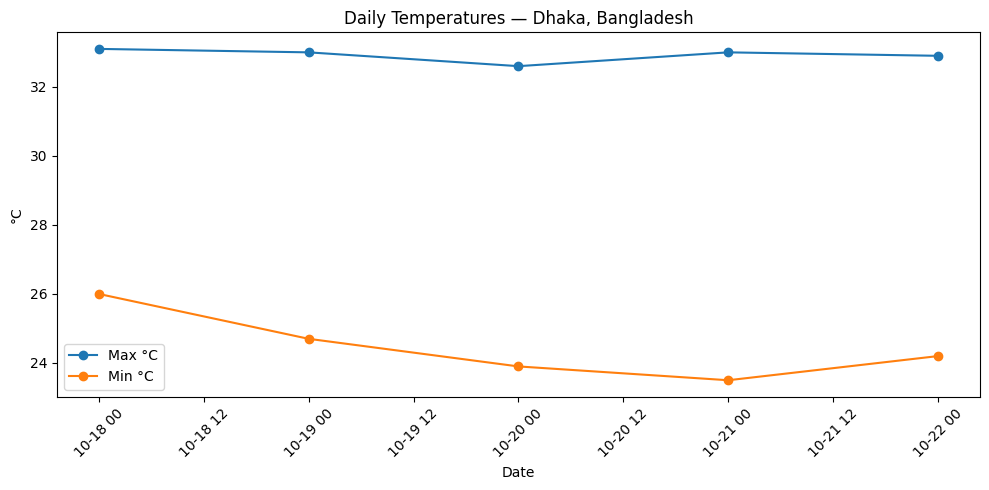

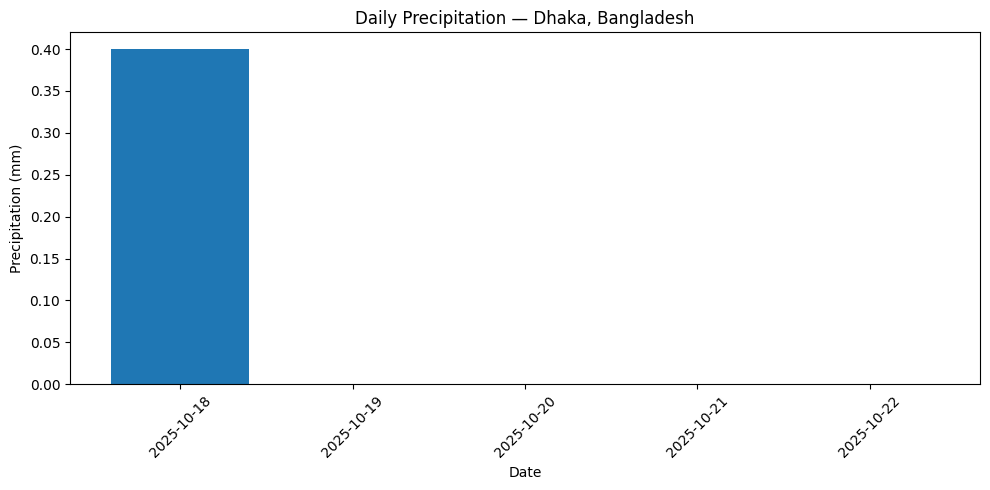

Q: Will it rain in Dhaka tomorrow?
Parsed: {'location': 'dhaka tomorrow', 'days_ahead': 1, 'days_span': 1, 'attribute': 'precipitation', 'raw': 'Will it rain in Dhaka tomorrow?'}
In Dhaka, Bangladesh (2025-10-19), expected rain summary → Total precipitation: 0.0 mm across 0 day(s).


In [234]:
# -----------------------------
# 🧪 Testing / Examples
# -----------------------------
def _demo():
    # Minimal demo without CLI
    d = get_weather_data("Dhaka", forecast_days=5)
    create_temperature_visualisation(d)
    create_precipitation_visualisation(d)
    q = "Will it rain in Dhaka tomorrow?"
    parsed = parse_weather_question(q)
    print("Q:", q)
    print("Parsed:", parsed)
    print(generate_weather_response(parsed, d))
_demo()


=== WeatherWise (Open-Meteo) ===
Enter city name (e.g., Dhaka): Dhaka
Forecast days (1-7): 3


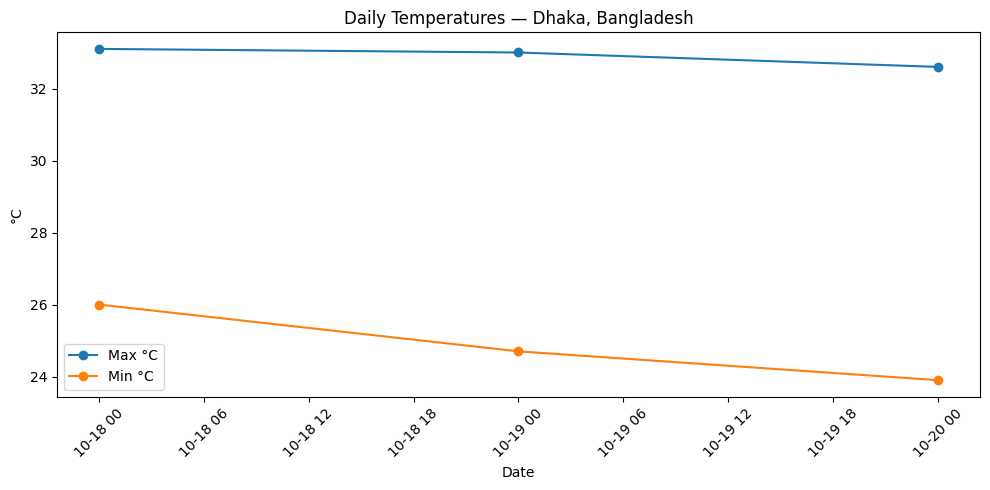

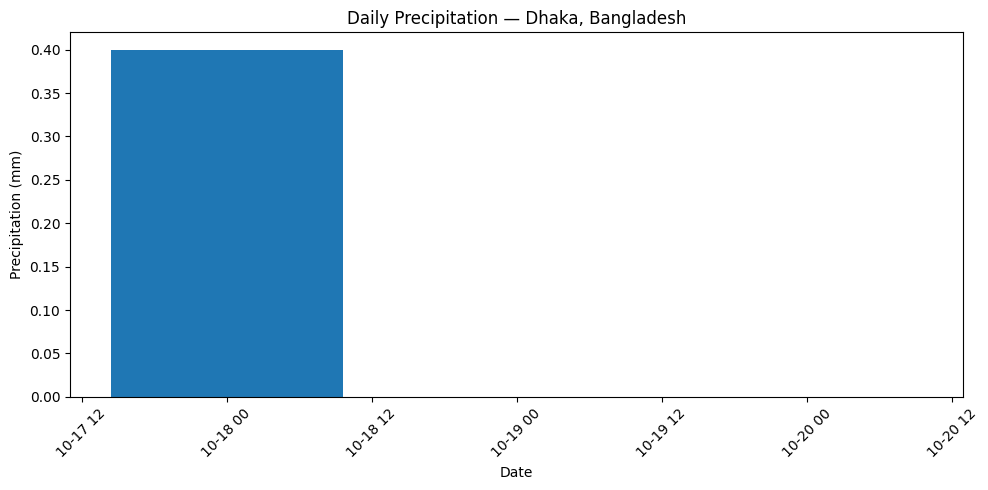

Ask a question (e.g., 'Will it rain in Dhaka tomorrow?'): Will it rain in Dhaka?
In Dhaka, Bangladesh (2025-10-18), expected rain summary → Total precipitation: 0.4 mm across 1 day(s). Carry an umbrella just in case.


In [235]:
run_cli()


## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.